In [1]:
import json
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

from coprover import *

In [2]:
def scan(X):
    mu, std, xmin, xmax = np.mean(X), np.std(X), np.min(X), np.max(X)
    return "mu/std={:.3f}/{:.3f}, min/max={:.3f}/{:.3f}".format(mu, std, xmin, xmax)



In [3]:
diffs_fpath = Path(DATA_ROOT, "pvs", "proof-diffs.json")
with open(diffs_fpath, 'r') as f:
    root = json.load(f)

In [4]:
print("Total entries={}".format(len(root)))

Total entries=3644


In [5]:
# There are two scripts, script1 and script2

SCRIPT1 = 'script1'
SCRIPT2 = 'script2'

diff_obj = root[34]
script1 = diff_obj[SCRIPT1]
script2 = diff_obj[SCRIPT2]

print("Lens script1={}, script2={}".format(len(script1), len(script2)))

# Experiment with identifying where the delta occurs
def runlen_diff(script1, script2):
    for idx, (step1, step2) in enumerate(zip(script1, script2)):
        if str(step1) != str(step2):
            return idx
    # If the two script lengths differ, then differs at first point one ended
    if len(script1) != len(script2):
        return min(len(script1), len(script2))
    return None # Absolutely no difference
            


Lens script1=9, script2=9


In [6]:
diff_idxes = []
diff_perc = []  # Percentage diff occurs at
nodiff_idxes = []
proof_lengths = []
for sidx, diff_obj in enumerate(tqdm(root)):
    script1 = diff_obj[SCRIPT1]
    script2 = diff_obj[SCRIPT2]
    didx = runlen_diff(script1, script2)
    if didx:
        diff_idxes.append(didx)
        length = min(len(script1), len(script2))
        perc = didx / length
        diff_perc.append(perc)
        proof_lengths.append(length)
    else:
        nodiff_idxes.append(sidx)
print("Total different={}, same={}".format(len(diff_perc), len(nodiff_idxes)))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3644/3644 [00:00<00:00, 13132.70it/s]

Total different=3124, same=520


In [7]:
Counter(diff_idxes)

Counter({3: 660,
         4: 403,
         6: 209,
         7: 141,
         2: 529,
         1: 391,
         8: 107,
         38: 2,
         35: 2,
         5: 321,
         10: 46,
         19: 3,
         12: 34,
         18: 12,
         9: 87,
         11: 49,
         14: 27,
         17: 6,
         15: 29,
         13: 23,
         22: 3,
         16: 10,
         24: 5,
         27: 1,
         28: 4,
         20: 8,
         30: 2,
         29: 3,
         21: 3,
         26: 3,
         31: 1})

We do an assessment of histograms of modified proof lengths, where the first diff occurs in terms of percentage of completion as well as raw value.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

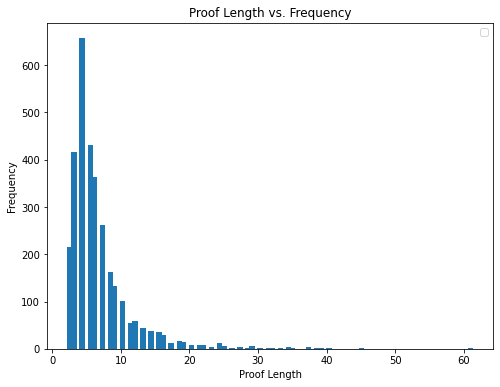

In [8]:
freqs, bin_pts = np.histogram(proof_lengths, bins=100)
plt.clf()
fig, ax = plt.subplots(1, figsize=(8,6))
ax.bar(bin_pts[1:], freqs)
plt.title("Proof Length vs. Frequency")
ax.set_xlabel("Proof Length")
ax.set_ylabel("Frequency")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

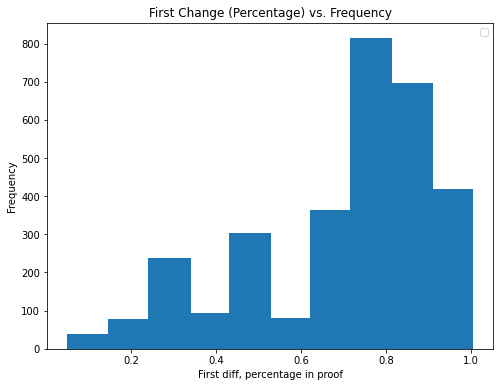

In [9]:
freqs, bin_pts = np.histogram(diff_perc, bins=10)
plt.clf()
fig, ax = plt.subplots(1, figsize=(8,6))
ax.bar(bin_pts[0:-1], freqs, align="edge", width=0.1)
plt.title("First Change (Percentage) vs. Frequency")
ax.set_xlabel("First diff, percentage in proof")
ax.set_ylabel("Frequency")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

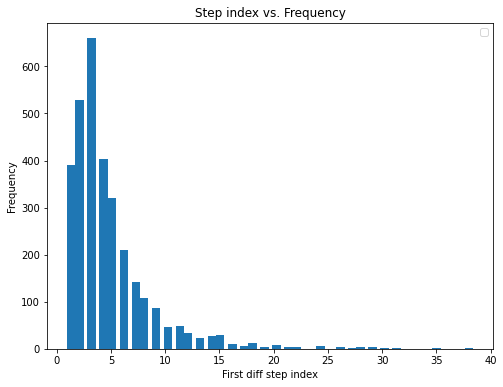

In [10]:
freqs, bin_pts = np.histogram(diff_idxes, bins=100)
plt.clf()
fig, ax = plt.subplots(1, figsize=(8,6))
ax.bar(bin_pts[1:], freqs)
plt.title("Step index vs. Frequency")
ax.set_xlabel("First diff step index")
ax.set_ylabel("Frequency")
plt.legend()

TODO Next
- Do an edit distance analysis of the steps themselves 
  - Simple Levenshtein edit distance check
  - Identify nature of the change

In [15]:
root[3]

{'tag': 'proof-difference',
 'library1': '~/nasalib-6.0.9',
 'library2': '~/pvslib-7.1',
 'theory': 'log',
 'declaration': 'log_1',
 'script1': ['',
  ['skosimp'],
  ['expand', 'log'],
  ['assert'],
  ['rewrite', 'nn_log_1'],
  ['liftIf'],
  ['assert']],
 'script2': ['',
  ['skosimp'],
  ['expand', 'log'],
  ['assert'],
  ['rewrite', 'nn_log_1'],
  ['liftIf'],
  ['propax']]}